In [1]:
import numpy as np
from scipy.linalg import cholesky
import matplotlib.pyplot as plt

### Gradient and Hessian
All the gradients and hessians of the functions have been calculated in the python file sym_grad.py using the Sympy library 

In [2]:
def Cholesky_Check(matrix):
	# First check if the matrix is asymmetrical
	if not np.allclose(matrix, matrix.T):
		return False
	try:
		cholesky(matrix)
		return True
	except np.linalg.LinAlgError:
		return False

### Gradient Descent with Back Tracking Algorithm
From lecture 4
- Loop(iterations)
    - initialize gradient of x 
    - define the step in the opposite direction
    - while($f(x_k + \alpha*p_k) > f(x_k) + c*\alpha*\nabla f_k^T $)
        - modify $\alpha$ to reduce step size
    - $x_{new} = x_k - \alpha*\nabla f(x)$
    - if $\| \nabla f(x) \| < tolerance$
        - Optimum $x = x_n$
        - break 

In [3]:
def GD_B(f, grad_f, x0, iterations=100, tol=1e-6, alpha = 0.01, c=1e-4, rho = 0.01):
	xk = x0
	x = [xk]
	alpha_list = [alpha]
	for i in range(iterations):
		grad = grad_f(xk)
		pk = -grad
		alpha_i = alpha
		while f(xk + alpha_i * pk) > f(xk) + c * alpha_i * np.dot(grad, pk):
			alpha_i *= rho
		alpha_list.append(alpha_i)
		x_n = xk - alpha_i * grad
		x.append(x_n)
		
		if np.linalg.norm(grad_f(x_n)) < tol:
			print(f"Converged in {i+1} iterations.")
			xk = x_n  
			break
		xk = x_n
		
	final_x = x[-1]
	distance_list_GD = []
	for val in x:
		dist = np.linalg.norm(val-final_x)
		distance_list_GD.append(dist)
	print(f"Optimum reached at: {final_x} with the value of f(x) being: {f(final_x)}")
	# print(f"Computed optimum using gradient descent: {computed_optimum}")
    # print(f"f(x) at computed optimum: {f(computed_optimum)}")
    # print(f"Final value of alpha = {alpha_history[-1]}")
	return distance_list_GD, alpha_list
	
	

### Newton's Method with Backtracking
From Lecture 4
- Loop(iterations)
    - initialize the gradient and hessian of f(x)
    - if $x_k$ is a vector
        - check if the hessian is positive definite
            - if $z^T H z > 0 \quad \forall z \in \mathbb{R}^n, z \neq 0 $
                - $p_k = -\nabla^2f(x_k)^{-1} * \nabla f(x_k)$
            - else add a small multiple gamma of identity matrix to hessian and find the step $p_k$
    - if $x_k$ is a scalar
        - if $\nabla^2 f(x)> 0$
            - $p_k = -\frac{\nabla f(x)}{\nabla^2f(x)}$
        else add a small gamma to make it positive 
    - while($f(x_k + \alpha*p_k) > f(x_k) + c*\alpha*\nabla f_k^T $)
        - modify $\alpha$ to reduce step size
    - $x_{new} = x_k - \alpha*\nabla f(x)$
    - if $\| \nabla f(x) \| < tolerance$
        - Optimum $x = x_n$
        - break 

In [4]:
def Newton(f, grad_f, hess_f, x0, iterations=100, tol=1e-6, alpha=0.01, rho=0.1, gamma=0, c = 1e-4):
	xk = x0
	x = [xk]
	alpha_list = [alpha]
	for i in range(iterations):
		grad = grad_f(xk)
		hess = hess_f(xk)
		if isinstance(xk, np.ndarray):
			'''Check if it can undergo Cholsky decomposition because if it can be be diagonalized then it is positive definite otherwise we need to add a small 
			value to the diagonal to make it positive definite'''
			if Cholesky_Check(hess):
				pk = np.linalg.solve(hess, -grad)
			else:
				pk = np.linalg.solve(hess + gamma*np.eye(hess.shape[0]), -grad)
		else:
			if hess>0:
				pk = -(grad/hess)
			else:
				pk = -(grad/(hess+gamma))
		alpha_i = alpha
		while f(xk + alpha_i * pk) > f(xk) + c*alpha_i*np.dot(grad, pk):
			alpha_i *= rho  

		alpha_list.append(alpha_i)  
		x_n = xk + alpha_i * pk
		x.append(x_n)
		if np.linalg.norm(grad_f(x_n)) < tol:
			print(f"Converged in {i+1} iterations.")
			xk = x_n  
			break
		xk = x_n
		
	final_x = x[-1]
	distance_list_GD = []
	for val in x:
		dist = np.linalg.norm(val-final_x)
		distance_list_GD.append(dist)
	return distance_list_GD, alpha_list

In [5]:
def f1(x):
	return -np.exp(-((x - 1)**2))

def f2(x):
	return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def f3(x):
	return x.T @ np.array([[3, 1], [1, 3]]) @ x + np.array([-1, 1]).T @ x

def f4(x):
	return 0.5 * np.dot(x.T, np.dot(np.array([[1, 1, 0], [1, 1, 0], [0, 0, 4]]), x)) - np.dot(np.array([0, 0, 1]), x)

def f1_gradient(x):
	return 2 * (x - 1) * np.exp(-((x - 1)**2))


def f2_gradient(x):
	df_dx = 2 * x[0] - 400 * x[0] * (-x[0]**2 + x[1]) - 2
	df_dy = -200 * x[0]**2 + 200 * x[1]
	return np.array([df_dx, df_dy])

def f3_gradient(x):
	return np.array([6*x[0] + 2*x[1] - 1, 2*x[0] + 6*x[1] + 1])

def f4_gradient(x):
	return np.array([x[0] + x[1], x[0] + x[1], 4 * x[2] - 1])

def f1_hessian(x):
	return (2 * np.exp(-((x - 1)**2)) - np.exp(-((x - 1)**2)) * (2 * x - 2)**2)

def f2_hessian(x):
	return np.array([[1200 * x[0]**2 - 400 * x[1] + 2, -400 * x[0]], 
				     [-400 * x[0], 200]])

def f3_hessian(x):
	return np.array([[6, 2], [2, 6]])

def f4_hessian(x):
	return np.array([[1, 1, 0], 
				     [1, 1, 0], 
					 [0, 0, 4]])

#### Part a
$$
f(x) = - e^{-(x-1)^2}, where \quad x_0 = 0
$$

Converged in 15 iterations.
Optimum reached at: 0.9999996569555734 with the value of f(x) being: -0.9999999999998823
Converged in 14 iterations.


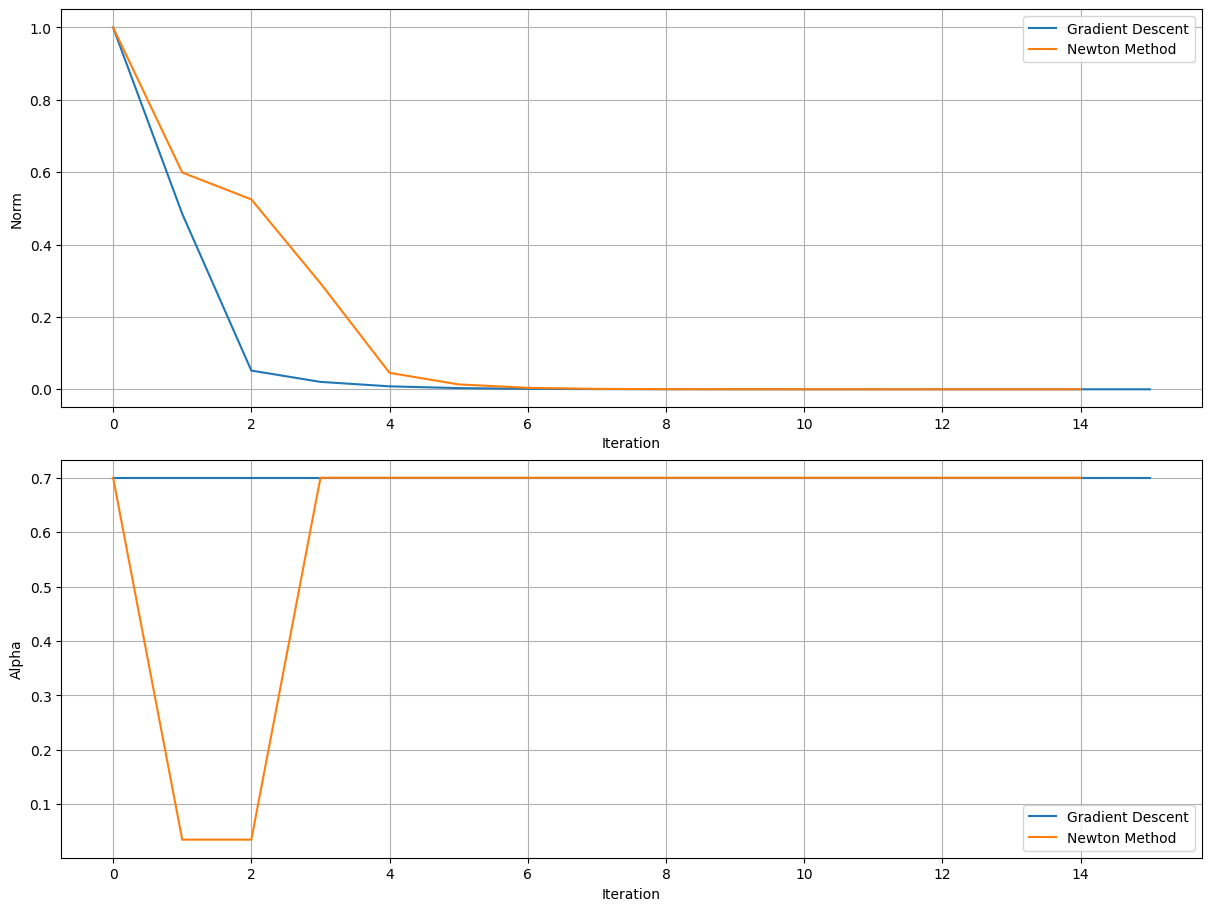

In [6]:
Norm_GD, alpha_GD = GD_B(f=f1, grad_f=f1_gradient, x0=0, iterations=100, alpha=0.7, rho=0.05)
Norm_Newton, alpha_Newton = Newton(f=f1, grad_f=f1_gradient, hess_f=f1_hessian, x0=0, iterations=100, alpha=0.7, rho=0.05, gamma=0.8)

plt.figure(figsize=[12,9], layout='constrained')
plt.subplot(2, 1, 1)
plt.plot(Norm_GD, label='Gradient Descent')
plt.plot(Norm_Newton, label='Newton Method')
plt.ylabel('Norm')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(alpha_GD, label='Gradient Descent')
plt.plot(alpha_Newton, label='Newton Method')
plt.ylabel('Alpha')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

#### Part b
$$
f(x) = (1-x)^2 + 100*(y-x^2)^2, where \quad x_0 = y_0 = 1.2
$$

Converged in 896 iterations.
Optimum reached at: [1.00000111 1.00000223] with the value of f(x) being: 1.2435811567802687e-12
Converged in 201 iterations.


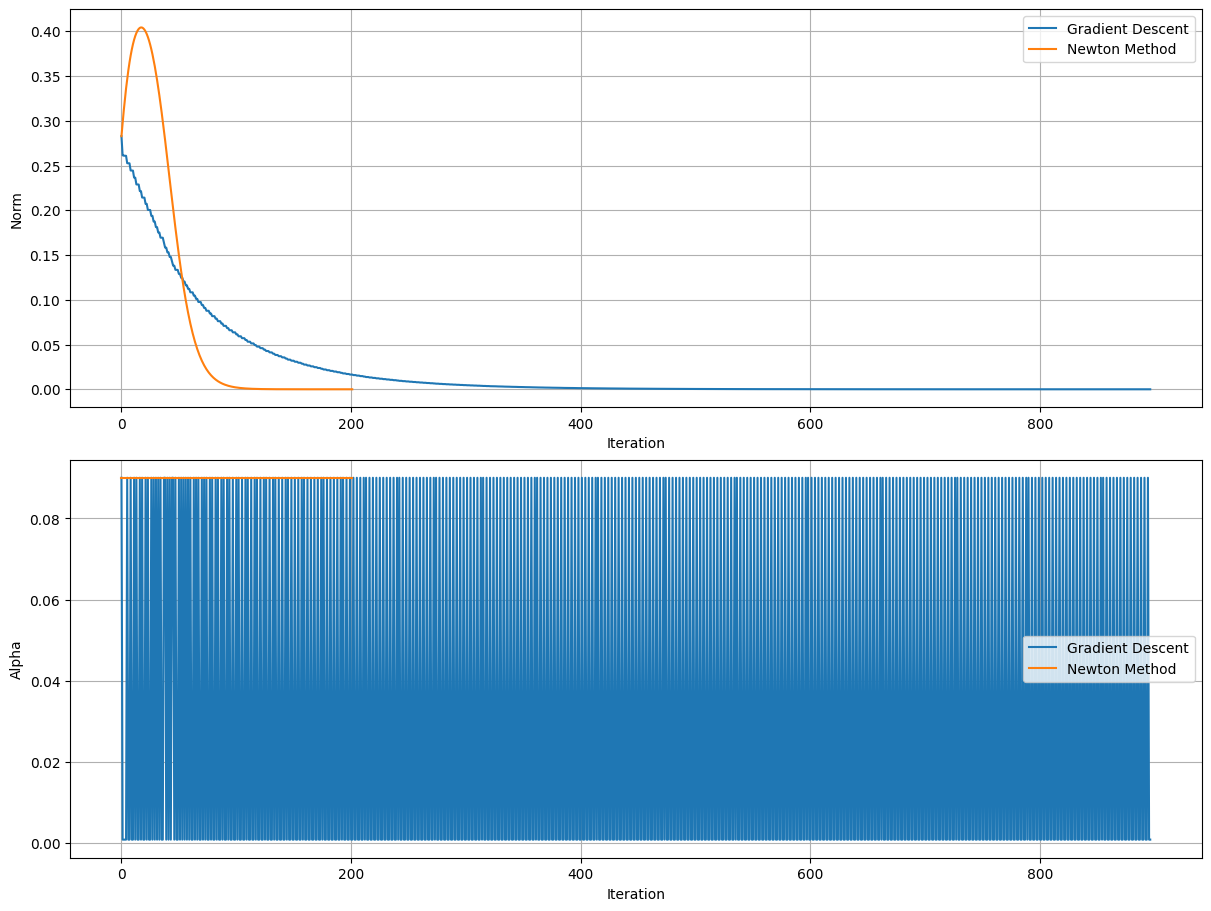

In [7]:
Norm_GD, alpha_GD = GD_B(f=f2, grad_f=f2_gradient, x0=np.array([1.2,1.2]), iterations=10000, alpha=0.09, rho=0.01)
Norm_Newton, alpha_Newton = Newton(f=f2, grad_f=f2_gradient, hess_f=f2_hessian, x0=np.array([1.2, 1.2]), iterations=10000, alpha=0.09, rho=0.1, gamma=(0.31))

plt.figure(figsize=[12,9], layout='constrained')
plt.subplot(2, 1, 1)
plt.plot(Norm_GD, label='Gradient Descent')
plt.plot(Norm_Newton, label='Newton Method')
plt.ylabel('Norm')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(alpha_GD, label='Gradient Descent')
plt.plot(alpha_Newton, label='Newton Method')
plt.ylabel('Alpha')
plt.xlabel('Iteration')
plt.grid()
plt.legend()


#### Part c
$$
f(x) = x^T \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}  x + \begin{bmatrix} -1 & 1 \end{bmatrix}*x, where \quad x_0 = \begin{pmatrix} 10 \\ 10 \end{pmatrix}
$$

Converged in 32 iterations.
Optimum reached at: [ 0.24999984 -0.24999984] with the value of f(x) being: -0.24999999999990147
Converged in 59 iterations.


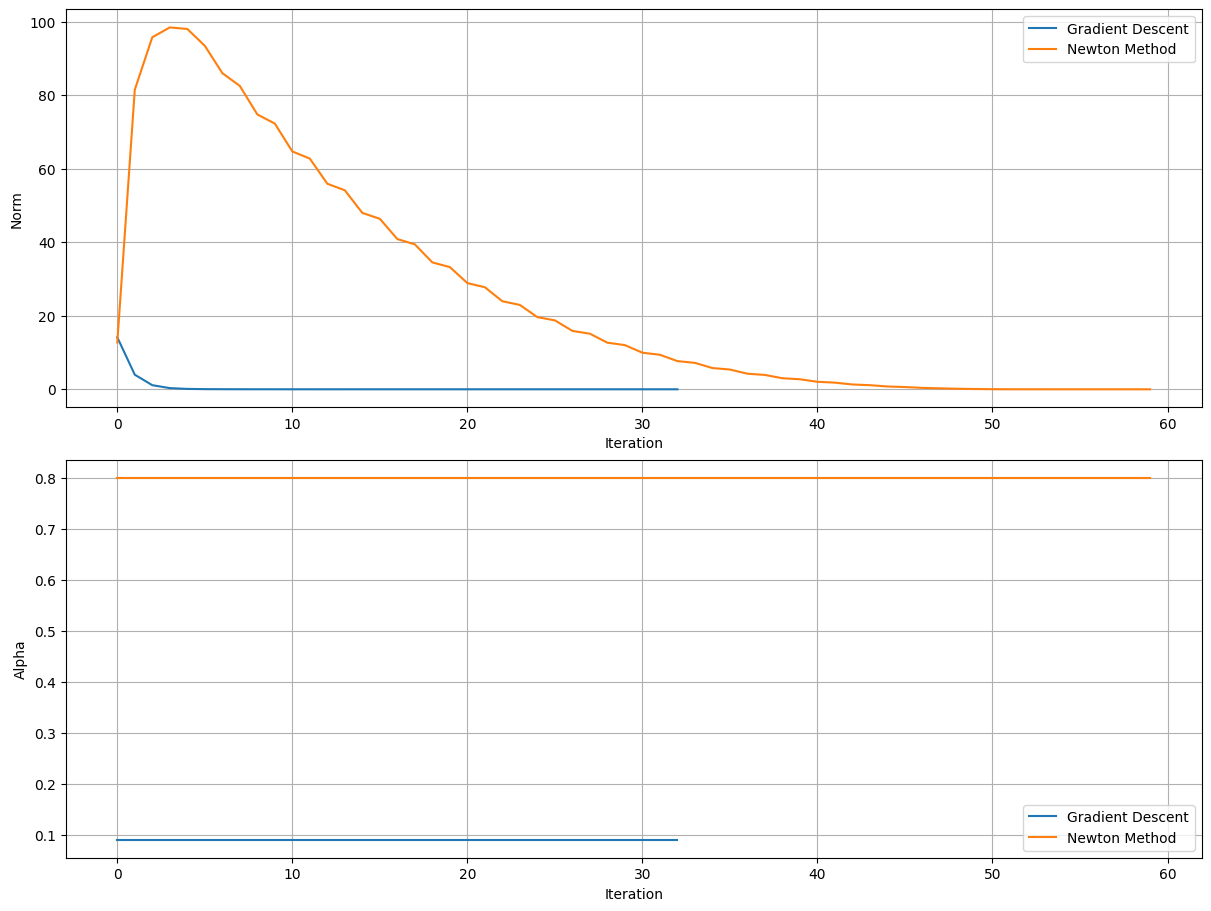

In [8]:
Norm_GD, alpha_GD = GD_B(f=f3, grad_f=f3_gradient, x0=np.array([10,10]), iterations=1000, alpha=0.09, rho=0.01)
Norm_Newton, alpha_Newton = Newton(f=f2, grad_f=f2_gradient, hess_f=f2_hessian, x0=np.array([10,10]), iterations=1000, alpha=0.8, rho=0.5)

plt.figure(figsize=[12,9], layout='constrained')
plt.subplot(2, 1, 1)
plt.plot(Norm_GD, label='Gradient Descent')
plt.plot(Norm_Newton, label='Newton Method')
plt.ylabel('Norm')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(alpha_GD, label='Gradient Descent')
plt.plot(alpha_Newton, label='Newton Method')
plt.ylabel('Alpha')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

#### Part d
$$
f(x) = \frac{1}{2}x\begin{bmatrix}1&1&0 \\ 1&1&0 \\ 0&0&4\end{bmatrix}x - \begin{bmatrix}0&0&1\end{bmatrix}x, where \quad x_0 = \begin{pmatrix}-10\\-10\\-10\end{pmatrix}
$$

Converged in 101 iterations.
Optimum reached at: [1.66550282e-109 1.66550282e-109 2.50000246e-001] with the value of f(x) being: -0.12499999999987918
Converged in 2 iterations.


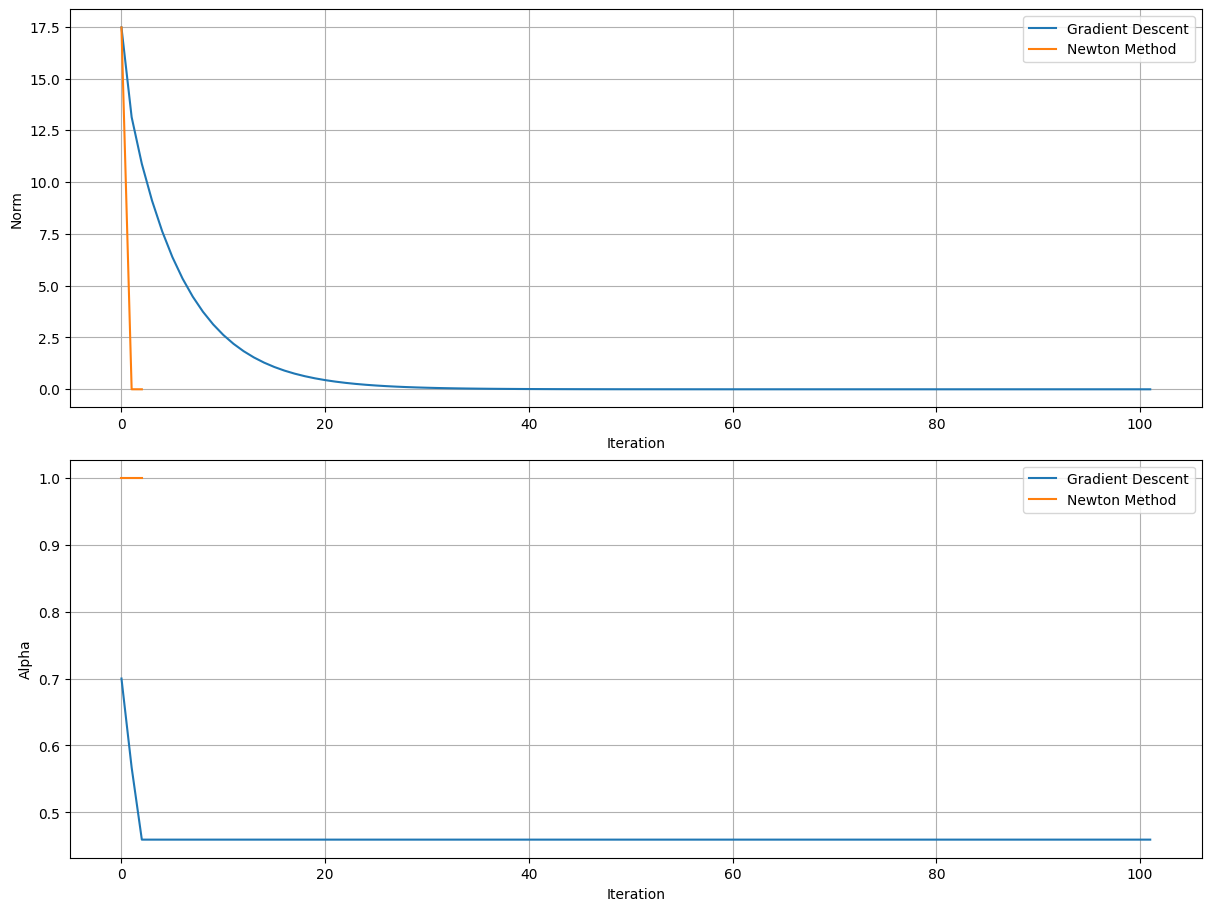

In [9]:
Norm_GD, alpha_GD = GD_B(f=f4, grad_f=f4_gradient, x0=np.array([-10, -10, -10]), alpha=0.7, rho=0.9, iterations=1000)
Norm_Newton, alpha_Newton = Newton(f=f4, grad_f=f4_gradient, hess_f=f4_hessian,x0=np.array([-10, -10, -10]), alpha=1.0, rho=0.5, gamma=1e-4)
plt.figure(figsize=[12,9], layout='constrained')
plt.subplot(2, 1, 1)
plt.plot(Norm_GD, label='Gradient Descent')
plt.plot(Norm_Newton, label='Newton Method')
plt.ylabel('Norm')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(alpha_GD, label='Gradient Descent')
plt.plot(alpha_Newton, label='Newton Method')
plt.ylabel('Alpha')
plt.xlabel('Iteration')
plt.grid()
plt.legend()

### Comments and Observations
- In each of the case the break condition is set as when the gradient becomes less than tolerance ie. it is as close to 0 as per the set value and thus the value of $f(x)$ at that instance is the minimum
- Both Newton's Method and Gradient Descent show varying degree of performace with GD outperforming 1 case in terms of number of iterations to convergence which can be attributed to choice of $\alpha$ and $\rho$

### References
- Lecture 4 - Newton method to approximate a square root [Link](https://github.com/righetti/optlearningcontrol/blob/main/Examples/Lecture%204%20-%20Newton%20method%20to%20approximate%20a%20square%20root.ipynb)
- Sympy Documetation [Link](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)
